# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


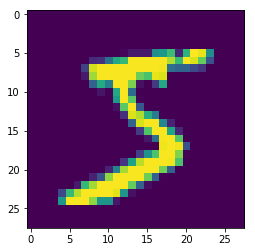

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:5]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))#3
model.add(Convolution2D(16, (3, 3), activation='relu'))#5
model.add(MaxPooling2D(pool_size=(2, 2)))#10
model.add(Convolution2D(16, 1, activation='relu'))#10
model.add(Convolution2D(16, (3, 3), activation='relu'))#12
model.add(MaxPooling2D(pool_size=(2, 2)))#24
model.add(Convolution2D(16, 1, activation='relu'))#24
model.add(Convolution2D(16, (3, 3), activation='relu'))#26
model.add(Convolution2D(16, (3, 3), activation='relu'))#28
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        272       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 16)          272       
__________

The model is vanilla model. Using only convolution layer with kernel 3X3 and one Max pooling layer. So Total parameters generated/trained by this model is 51466.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Here Using default adam optimizer and loss function as categorical_crossentropy.

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.2463 - acc: 0.9218
Epoch 2/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0804 - acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0607 - acc: 0.9813
Epoch 4/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0510 - acc: 0.9843
Epoch 5/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0448 - acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0399 - acc: 0.9872
Epoch 7/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0353 - acc: 0.9887
Epoch 8/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0326 - acc: 0.9898
Epoch 9/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0297 - acc: 0.9908
Epoch 10/10
60000/60000 [==============================] - 10s 170us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.04036512352786376, 0.9862]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.7020554e-07 6.8919634e-09 9.8443270e-06 9.3190118e-07 4.0519067e-06
  9.9923202e-11 2.4775950e-13 9.9996924e-01 1.6686030e-07 1.5539066e-05]
 [5.1930374e-07 1.0814213e-04 9.9975938e-01 6.6259041e-08 4.3580837e-07
  1.2094365e-08 3.1657058e-07 3.0896517e-05 1.0007942e-04 9.7731903e-09]
 [9.4096208e-07 9.9910563e-01 4.2282559e-07 2.8868447e-04 7.7823652e-06
  1.6418452e-04 3.1526322e-06 1.8702052e-05 4.0668255e-04 3.8359608e-06]
 [9.9997878e-01 1.9232506e-14 2.8542049e-08 1.0024299e-09 8.2331919e-10
  3.1384459e-08 1.5833491e-05 7.2303127e-12 2.1842663e-08 5.3247595e-06]
 [1.5223906e-12 2.4194267e-13 4.5809833e-07 3.6161570e-11 9.9998462e-01
  8.9079616e-10 2.4429647e-09 7.7665149e-08 2.1842833e-08 1.4721567e-05]
 [2.3752305e-07 9.9990749e-01 7.4479232e-08 1.5296093e-06 4.5652459e-06
  3.8003977e-06 2.3326282e-07 6.6565204e-05 1.3040374e-05 2.4090173e-06]
 [2.2638950e-11 1.2238239e-07 1.2775801e-06 5.9859750e-10 9.9714249e-01
  2.3381604e-06 1.2694724e-07 3.9578317e-06 2.2474756e-03 

In [18]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f522d6bac88>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f522d6bae48>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f522d6decc0>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f522d6b71d0>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f522d6b7390>, 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D object at 0x7f522ce2aef0>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7f522ce90828>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7f522ce2ae80>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7f522ce53160>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7f522cdebfd0>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f522ce16208>, 'activation_1': <keras.layers.core.Activation object at 0x7f522cdafd68>}


Showcasing the different filters/channels.

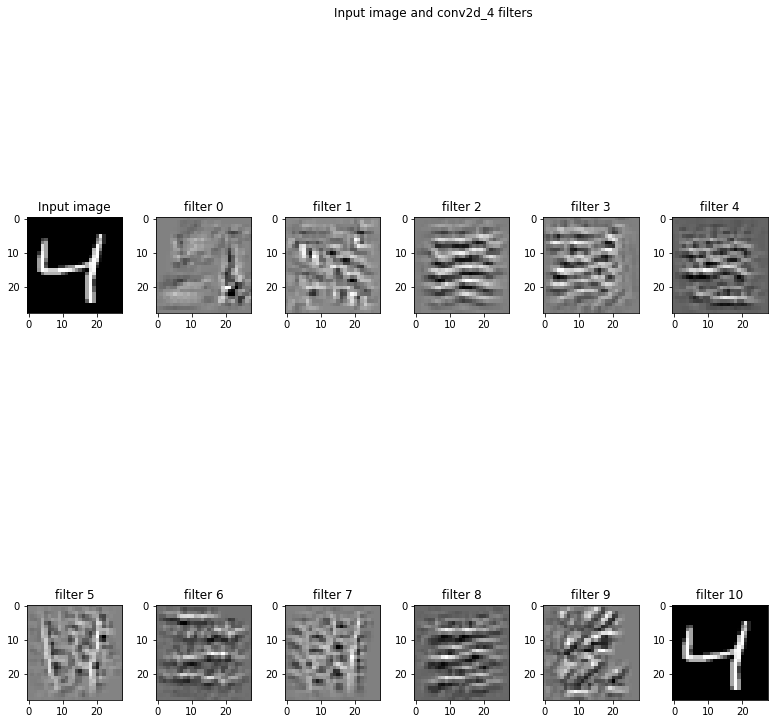

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()